In [28]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [29]:
class CustomLinearRegression:
    def check_input(self, X, y=None):
        '''
            Description: Checks if the input is a Pandas DataFrame,
                         Pandas Series or Numpy array
            
            Parameters: X: Data
                        y: Target values
                        
            Returns: ValueError if input is invalid
                     True otherwise
        '''
        if not isinstance(X, (pd.Series, pd.DataFrame, np.ndarray)):
            error = """ X required as a Pandas DataFrame, 
                        Pandas Series or a Numpy array. Found type: {datatype_x}
                    """.format(datatype_x=type(X))
            raise TypeError(error)
        if y is not None and not isinstance(y, (pd.Series, pd.DataFrame, np.ndarray)):
            error = """ y required as a Pandas DataFrame, 
                        Pandas Series or a Numpy array. Found type: {datatype_y}
                    """.format(datatype_y=type(y))
            raise TypeError(error)
        return True
    
    def transform_input(self, X, y=None):
        '''
            Description: Transforms the input into 2D numpy array before fitting the model
            
            Parameters: X: Data
                        y: Target values
                        
            Returns: If input is of valid format:
                         X: Returns data X as a 2D numpy array
                         y: Returns target y as a 2D numpy array
                     Otherwise returns the input as it is
        '''
        if self.check_input(X, y):
            # Convert X into numpy array
            if isinstance(X, pd.DataFrame):
                X = X.values
            elif isinstance(X, pd.Series):
                X = X.values
                X = X[:, None]
            # Convert y into numpy array
            if y is not None:
                if isinstance(y, pd.DataFrame):
                    y = y.values
                elif isinstance(y, pd.Series):
                    y = y.values
                    y = y[:, None]
        if y is None:
            return X
        else:
            return X, y
        
    def fit(self, X, y):
        '''
            Description: Finds the line of best fit for the given training set
                         using the ordinary least square estimator.
                         It uses the training data to find the beta coeffiecients needed
                         to minimize the least squared error.
                         
            Parameters: X: Training data
                           Type: Numpy array, Pandas Series or Pandas DataFrame
                        y: Target values
                           Type: Numpy array, Pandas Series or Pandas DataFrame
                         
            Returns: self: Returns an instance of self
        '''
        X, y = self.transform_input(X, y)
        X = np.insert(X, 0, values=1, axis=1)
        coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y).ravel()
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]
        return self
    
    def predict(self, X):
        '''
            Description: Predict target values using linear model
            
            Parameters: X: Sample data
                           Type: Numpy array, Pandas Series or Pandas DataFrame
                           
            Returns: C: Predicted target values
                        Type: Numpy array
                        Shape: (n_samples,)
        ''' 
        X = self.transform_input(X)
        X = np.insert(X, 0, values=1, axis=1)
        coefs = np.insert(self.coef_, 0, values=self.intercept_)
        return np.dot(X, coefs)

In [30]:
# Load the dataset

dataset = pd.read_csv('dataset.csv', names=['x', 'y'], skiprows=1)
dataset.head()

,x,y
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [31]:
# Load some more info about the dataset

dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
x    8 non-null int64
y    8 non-null int64
dtypes: int64(2)
memory usage: 208.0 bytes


,x,y
count,8.000000,8.000000
mean,11.125000,63.625000
std,4.673252,32.429869
min,2.000000,10.000000
25%,9.750000,43.250000
50%,10.500000,65.000000
75%,15.250000,93.500000
max,16.000000,98.000000


In [32]:
# Split the dataset into training and testing

X = dataset['x']
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44, random_state=100)

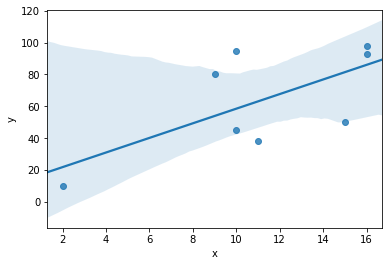

In [33]:
# Visualize the linear relationship between the two variables

sns.regplot(x=X, y=y, data=dataset)

In [34]:
# Predicting target values using CustomLinearRegression class

my_lm = CustomLinearRegression()
y_pred = my_lm.fit(X_train, y_train).predict(X_test)
# Calculate r2 score
model_score = r2_score(y_test, y_pred)
print("Running custom Linear Regression class...")
print("Equation of best fit line: y = {b0} + {b1}x".format(b0=my_lm.intercept_, b1=my_lm.coef_[0]))
print("Predicted values: {y_pred}".format(y_pred=y_pred))
print("R2 score of custom model : {model_score}".format(model_score=model_score))

Running custom Linear Regression class...
Equation of best fit line: y = 60.0 + 0.692307692307689x
Predicted values: [66.23076923 66.92307692 71.07692308 61.38461538]
R2 score of custom model : 0.11440307522197823


In [35]:
# Predicting target values using sklearn LinearRegression class

lm = LinearRegression()
y_pred = lm.fit(X_train[:, None], y_train).predict(X_test[:, None])
# Calculate r2 score
model_score = r2_score(y_test, y_pred)
print("Running sklearn Linear Regression class...")
print("Equation of best fit line: y = {b0} + {b1}x".format(b0=my_lm.intercept_, b1=my_lm.coef_[0]))
print("Predicted values: {y_pred}".format(y_pred=y_pred))
print("R2 score of sklearn linear model : {model_score}".format(model_score=model_score))

Running sklearn Linear Regression class...
Equation of best fit line: y = 60.0 + 0.692307692307689x
Predicted values: [66.23076923 66.92307692 71.07692308 61.38461538]
R2 score of sklearn linear model : 0.1144030752219789
